In [13]:
#SUPG implementation was done using quadratic basis function for convection domainted problem

In [14]:
import sympy as sp

In [15]:
N=int(input("enter the number of elements"))
domain=[]
for i in range(2*N+1):
    domain.append(i/(2*N))

In [16]:
k=float(input("enter the constant"))
delta=k/N
delta

0.01

In [17]:
x=sp.Symbol("x")
function=[]
for i in range(2*N-1):
    expr=[]
    for j in range(N):
        if(i%2==0):
            m=i/2
            if(j==m):
                f1=((x-domain[i])*(x-domain[i+2]))/((domain[i+1]-domain[i])*(domain[i+1]-domain[i+2]))
                expr.append(f1)
            else:
                expr.append(0)
        else:
            m=int(i/2)
            if(j==m):
                f1=((x-domain[i-1])*(x-domain[i]))/((domain[i+1]-domain[i-1])*(domain[i+1]-domain[i]))
                expr.append(f1)
            elif(j==(m+1)):
                f2=((x-domain[i+2])*(x-domain[i+3]))/((domain[i+1]-domain[i+2])*(domain[i+1]-domain[i+3]))
                expr.append(f2)
            else:
                expr.append(0)
    function.append(expr)


In [25]:
a_x=input("enter a(x): ")
a_x=sp.sympify(a_x)
b_x=input("enter b(x): ")
b_x=sp.sympify(b_x)
c_x=input("enter c(x): ")
c_x=sp.sympify(c_x)
f_x=input("enter f(x): ")
f_x=sp.sympify(f_x)
print(a_x,b_x,c_x,f_x)

1/10000 1 1 1


In [26]:
def simpson13(f,a,b,n):
    h=(b-a)/n
    result=f(a)+f(b)
    for i in range(1,n):
        x=a+i*h
        if(i%2==0):
            result=result+2*f(x)
        else:
            result=result+4*f(x)
    result=result*(h/3)
    return result

In [27]:
b=[]
for i in range(2*N-1):
    if(i%2==0):
        m=int(i/2)
        y_1=f_x*function[i][m]+f_x*sp.diff(function[i][m],x)*delta
        f_1 = sp.lambdify(x, y_1, modules=['math'])
        r_1=simpson13(f_1,i/(2*N),(i+2)/(2*N),2)
        b.append(r_1)
    else:
        m=int(i/2)
        y_1=f_x*function[i][m]+f_x*sp.diff(function[i][m],x)*delta
        f_1 = sp.lambdify(x, y_1, modules=['math'])
        r_1=simpson13(f_1,(i-1)/(2*N),(i+1)/(2*N),2)
        y_2=f_x*function[i][m+1]+f_x*sp.diff(function[i][m+1],x)*delta
        f_2 = sp.lambdify(x, y_2, modules=['math'])
        r_2=simpson13(f_2,(i+1)/(2*N),(i+2)/(2*N),2)
        r=r_1+r_2
        b.append(r)
    


In [28]:
import numpy as np
A = np.zeros((2*N-1, 2*N-1))
for j in range(N):
        if(j==0):
            local=np.zeros((2,2))
            for i in range(2):
                for k in range(2):
                    p2=sp.diff(function[k][j],x)
                    p1=sp.diff(function[i][j],x)
                    f_2=a_x*p2*p1-a_x*(sp.diff(p2,x))*(sp.diff(function[i][j],x)*delta)+(b_x)*p2*(function[i][j]+sp.diff(function[i][j],x)*delta)+c_x*function[k][j]*(function[i][j]+sp.diff(function[i][j],x)*delta)
                    y2 = sp.lambdify(x, f_2, modules=['math'])
                    r2=simpson13(y2,0,1/N,2)
                    local[i][k]=r2
                    A[i][k]=local[i][k]
        elif(j==N-1):
            local=np.zeros((2,2))
            for i in range(2):
                for k in range(2):
                    p2=sp.diff(function[k+2*j-1][j],x)
                    p1=sp.diff(function[i+2*j-1][j],x)
                    f_2=a_x*p2*p1-a_x*(sp.diff(p2,x))*(sp.diff(function[i+2*j-1][j],x)*delta)+(b_x)*p2*(function[i+2*j-1][j]+sp.diff(function[i+2*j-1][j],x)*delta)+c_x*function[k+2*j-1][j]*(function[i+2*j-1][j]+sp.diff(function[i+2*j-1][j],x)*delta)
                    y2 = sp.lambdify(x, f_2, modules=['math'])
                    r2=simpson13(y2,(j)/N,(j+1)/N,2)
                    local[i][k]=r2
            for i in range(2):
                for k in range(2):
                    if (A[i+2*j-1][k+2*j-1]==0):
                        A[i+2*j-1][k+2*j-1]=local[i][k]
                    else:
                        l1=A[i+2*j-1][k+2*j-1]
                        A[i+2*j-1][k+2*j-1]=l1+local[i][k]
            
        else:
            local=np.zeros((3,3))
            for i in range(3):
                for k in range(3):
                    p2=sp.diff(function[k+2*j-1][j],x)
                    p1=sp.diff(function[i+2*j-1][j],x)
                    f_2=a_x*p2*p1-a_x*(sp.diff(p2,x))*(sp.diff(function[i+2*j-1][j],x)*delta)+(b_x)*p2*(function[i+2*j-1][j]+sp.diff(function[i+2*j-1][j],x)*delta)+c_x*function[k+2*j-1][j]*(function[i+2*j-1][j]+sp.diff(function[i+2*j-1][j],x)*delta)
                    y2 = sp.lambdify(x, f_2, modules=['math'])
                    r2=simpson13(y2,(j)/N,(j+1)/N,2)
                    local[i][k]=r2
            for i in range(3):
                for k in range(3):
                    if (A[i+2*j-1][k+2*j-1]==0):
                        A[i+2*j-1][k+2*j-1]=local[i][k]
                    else:
                        l1=A[i+2*j-1][k+2*j-1]
                        A[i+2*j-1][k+2*j-1]=l1+local[i][k]
            



In [30]:
import numpy as np
A=np.array(A)
b=np.array(b)
x=np.linalg.solve(A,b)

In [31]:
for i in range(2*N-1):
    for j in range(N):
        function[i][j]=function[i][j]*x[i]

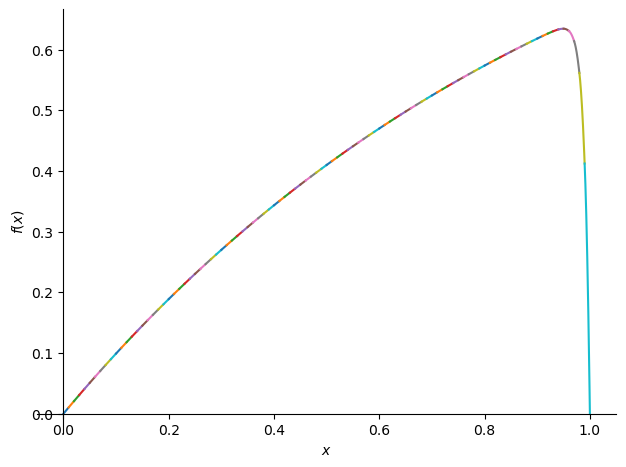

In [32]:
x=sp.Symbol("x")
plotarg=[]
for j in range(N):
    if(j==0):
        plotarg.append((function[0][0]+function[1][0],(x,0,1/N)))
    elif(j==N-1):
        plotarg.append((function[2*j-1][j]+function[2*j][j],(x,(j)/N,(j+1)/N)))
    else:
        plotarg.append((function[2*j+1][j]+function[2*j-1][j]+function[2*j][j],(x,(j)/N,(j+1)/N)))
            
p = sp.plot(*plotarg, show=False)
p.show()